# Predicting the Health of Lower Backs (Lumbar Region)

### Predictions are based on the data of related parts of the body, specifically the network of spinal muscles, nerves, bones, discs, or tendons in the lumbar spine
#### The response is binary, abnormal or normal

In [1]:
# Import Libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Imported data retrieved from https://www.kaggle.com/sammy123/lower-back-pain-symptoms-dataset

data = pd.read_csv("Dataset_spine.csv")
data = data.drop(columns=["Unnamed: 13"]) # Original dataset had extra descriptions listed in a column
display(data.head(5))
display(data.tail(3))

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,diagnosis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,diagnosis
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,0.674504,19.3825,17.6963,13.72929,1.783007,40.6049,Normal


In [2]:
# Now we want to change the diagnosis column so that Abnormal = 1 and Normal = 0

def diagnosisToBin(row):
    if row.diagnosis == "Abnormal":
        return 1
    else:
        return 0

data["diagnosis"] = data.apply(lambda row: diagnosisToBin(row), axis=1)
display(data.head(3))
display(data.tail(3))

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,diagnosis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,diagnosis
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,0
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,0.674504,19.3825,17.6963,13.72929,1.783007,40.6049,0


In [3]:
# Next let's see if we need to clean our data some more

## Checking for null entries
display(data.isnull().sum())
display(data.info())

## Check for duplicates
display(data[data.duplicated()])

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
diagnosis                   0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  diagnosis                 310 non-null    int64  
dtypes: float64(12), int64(1)
memory usage: 31.6 KB


None

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,diagnosis


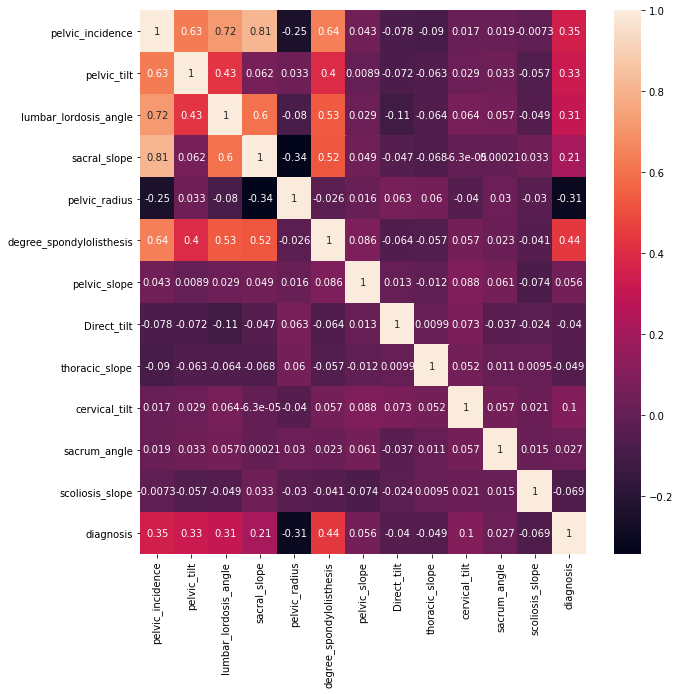

In [4]:
# Since there are no null entries, and each column has the correct
# data type, we can go ahead and start training our model

# First we want to see if there is correlation between the diagnosis and our features

corrMatrix = data.corr()
plt.subplots(figsize=(10,10))

sns.heatmap(corrMatrix, annot=True)
plt.show()

#### We can see that there is a relatively high correlation between our dependent variate diagnosis, and the degree of the spondylolisthesis. Pelvic incidence and pelvic tilt also show some correlation with diagnosis and a negative correlation exists between the diagnosis and pelvic radius

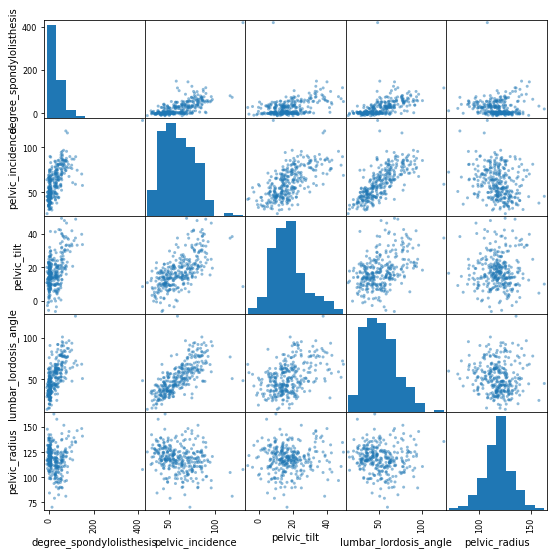

In [5]:
# Let's now visualize some of the features with high correlation with diagnosis

scatter_matrix(data[["degree_spondylolisthesis", "pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "pelvic_radius"]], figsize=(9,9))
plt.show()

In [6]:
# Now we split our data into training and testing sets
X = data.drop(columns="diagnosis") # Isolate our features
X = scale(X)

y = data["diagnosis"] # The response

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1, shuffle=True)

### To evaluate the performance of our models, we will use Repeated k-Fold Cross-Validation

In [7]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

rkf = RepeatedKFold(n_splits=15, n_repeats=5, random_state=1)


In [8]:
# First let's try Logistic Regression
from sklearn.linear_model import LogisticRegression

logrmodel = LogisticRegression()

scores = cross_val_score(logrmodel, X_train, y_train, scoring="accuracy", cv=rkf)
print("Mean Accuracy (LogReg): %f | SD: (%f)" % (mean(scores), std(scores)))

Mean Accuracy (LogReg): 0.839265 | SD: (0.089691)


In [9]:
# Now let's observe our 2nd model, Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnbmodel = GaussianNB()

scores1 = cross_val_score(gnbmodel, X_train, y_train, scoring="accuracy", cv=rkf)
print("Mean Accuracy (GNB): %f | SD: (%f)" % (mean(scores1), std(scores1)))

Mean Accuracy (GNB): 0.774167 | SD: (0.100548)


In [10]:
# We will run one more commonly used model for binary classification, Support Vector Machine
from sklearn.svm import SVC

svmodel = SVC(kernel="linear")

scores2 = cross_val_score(svmodel, X_train, y_train, scoring="accuracy", cv=rkf)
print("Mean Accuracy (SVM): %f | SD: (%f)" % (mean(scores2), std(scores2)))

Mean Accuracy (SVM): 0.839020 | SD: (0.078288)


### From the 3 models that we ran on our training data, the LogisticRegression and SVM models both performed well, with an accuracy score of ~84%.
### Since the accuracy scores are nearly identical, but the SVM model has a lower standard deviation and we have a relatively smaller data set, we shall choose SVM as our model

## Now we will run the model on our test data to get an evaluation of our model on unseen data

In [11]:
# Chosen model is SVM
model = SVC(kernel="linear")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Test data accuracy score: ", accuracy_score(y_test, y_pred))

print("Model: %s -->  Precision: %f | Recall: %f | F1: %f" % ("SVM", precision_score(y_test, y_pred, average="weighted"), recall_score(y_test, y_pred, average="weighted"), f1_score(y_test, y_pred, average="weighted")))

Test data accuracy score:  0.8709677419354839
Model: SVM -->  Precision: 0.869257 | Recall: 0.870968 | F1: 0.869073


## It appears that our model (SVM) accurately predicted the abnormality of a lower back ~87% of the time in our test data!